# Проект: Исследование клиентов фитнес-центра

## Краткое описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. 
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо. 


Индикаторы оттока зависят от специфики отрасли.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. 
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.  

## Цель проекта
Провести исследование данных, проанализировать основные признаки, наиболее сильно влияющие на отток и подготовить рекомендации по удержанию клиентов.

## Задачи проекта
- Научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- Найти основные признаки, наиболее сильно влияющие на отток;
- Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    1) выделить целевые группы клиентов;
    2) предложить меры по снижению оттока;
    3) определить другие особенности взаимодействия с клиентами.

## Описание данных

**Данные клиента за предыдущий до проверки факта оттока месяц:**
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент  в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;
- 'Churn' — факт оттока в текущем месяце.

## Шаг 1. Загрузка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
# загрузим данные
try:
    df = pd.read_csv('gym_churn.csv') 
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
# получим общую информацию о данных
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [5]:
# укоротим название одного из столбцов
df.rename(columns = {'avg_class_frequency_current_month':'avg_class_fr_current_month'}, inplace = True)

#### Выводы
Пропусков данных нет, типы данных соответствуют хранимым данным.

## Шаг 2. Исследовательский анализ данных (EDA)

In [6]:
# посмотрим на описательную статистику данных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


По анализу описательной статистики каких-либо аномалий не видно. Данные представляются корректными.

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [7]:
# сгруппируем данные по целевой переменной и полцчим средние значения признаков
df.groupby('churn')[df.drop(columns='churn').columns].mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


#### Выводы
- Пол. По полу отличий между группами нет.
- Локация. Те, кто остался в среднем живут и работают поближе к фитнес-центру.
- Партерская программа. Те, кто остался в среднем существенно чаще являются участниками партнёрской программы.
- "Приведи друга". Те, кто остался в среднем существенно чаще пришли в клуб в рамках акции "Приведи друга".
- Наличие контактного телефона. Существенных отличий между группами нет.
- Контрактный период. У тех, кто остался в среднем контрактный период выше в разы.
- Участие в групповых занятиях. Те, кто остался в среднем посещают групповые зания существенно чаще.
- Возраст. В среднем более старшие клиенты реже бросают занятия.
- Суммарная выручка от других услуг фитнес-центра выше у оставшихся клиентов.
- У тех, кто остался в среднем период до окончания контракта и "время жизни" выше в разы.
- Средняя частота посещений в неделю за все время и за предыдущий месяц существенно выше у тех, кто остался.

#### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

In [8]:
# выделим признаки с количественными данными
columns_numeric = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 
                   'avg_class_frequency_total', 'avg_class_fr_current_month']

In [9]:
import warnings
warnings.filterwarnings("ignore")

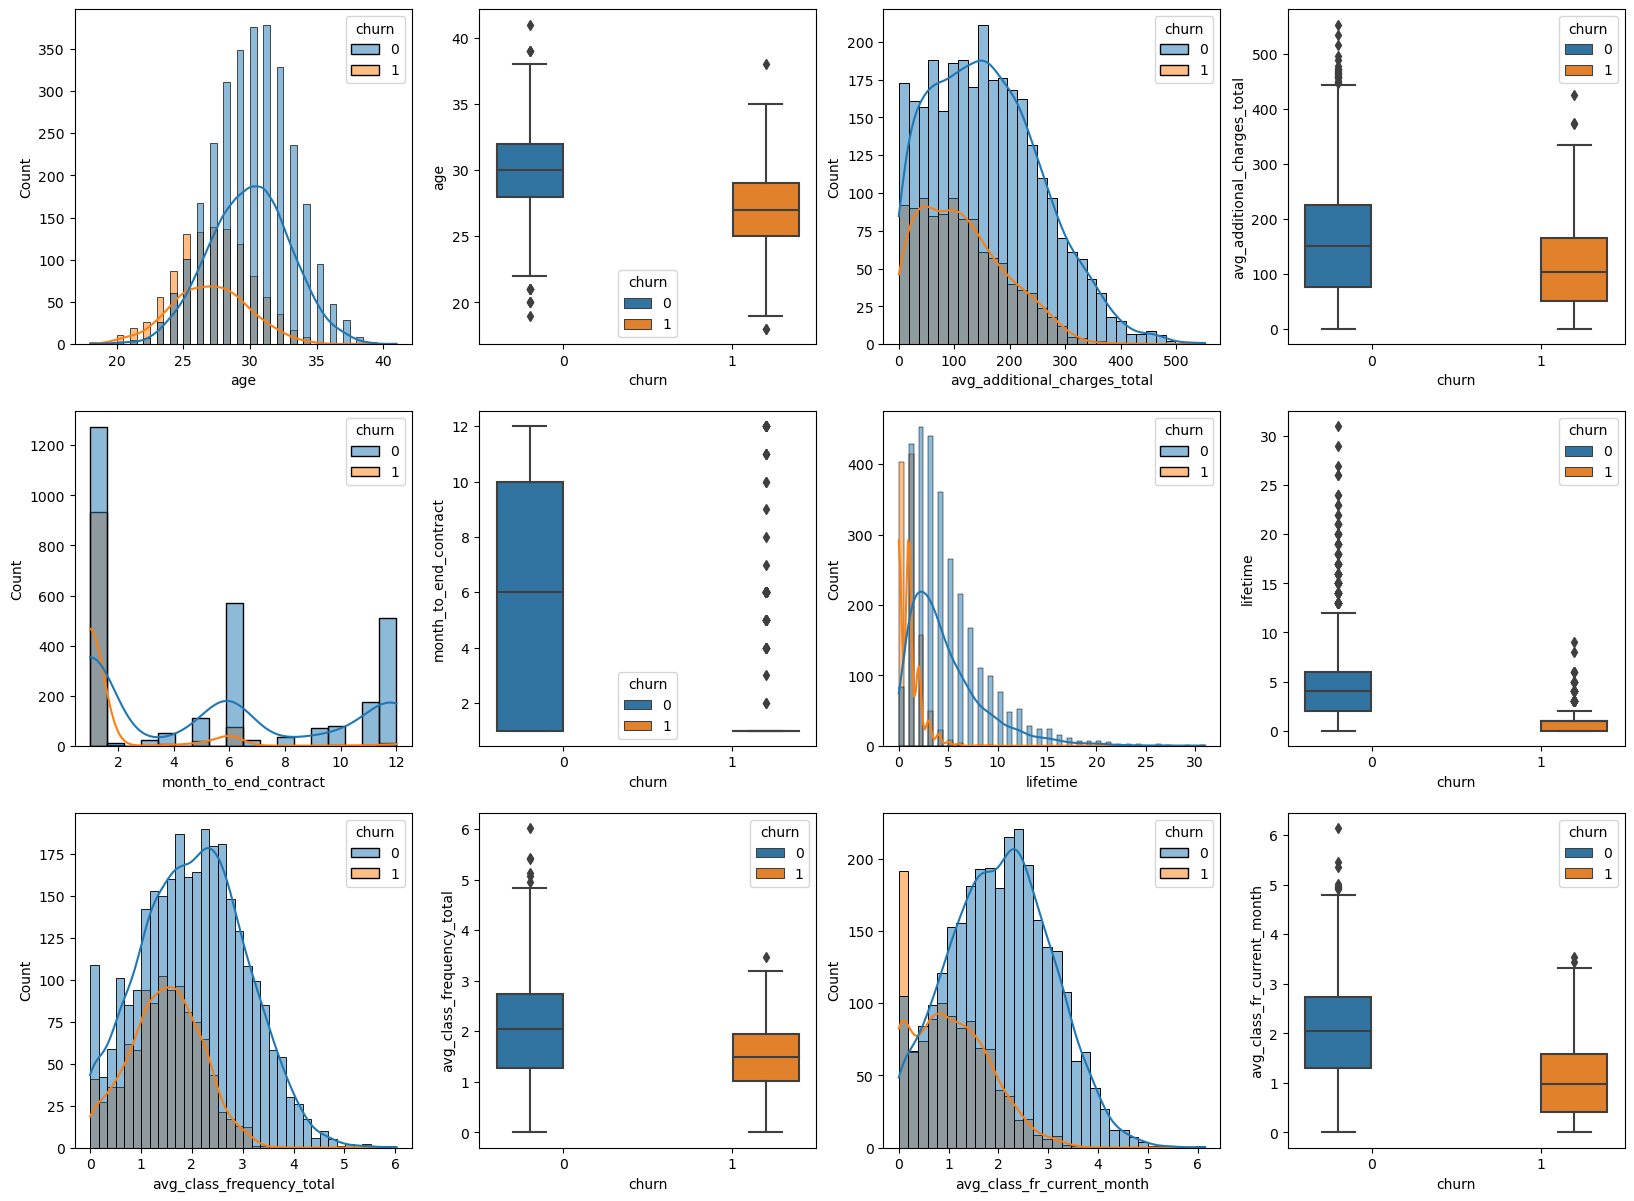

In [10]:
# построим гистограммы и boxplot для количественных данных
fig, ax = plt.subplots(figsize=(20, 20))

i=1
for column in columns_numeric:    
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=column, hue='churn', kde=True)
    i+=1
    plt.subplot(4, 4, i)
    sns.boxplot(x='churn', y=column, data=df, hue='churn', orient='v')  
    i+=1
    
plt.show()

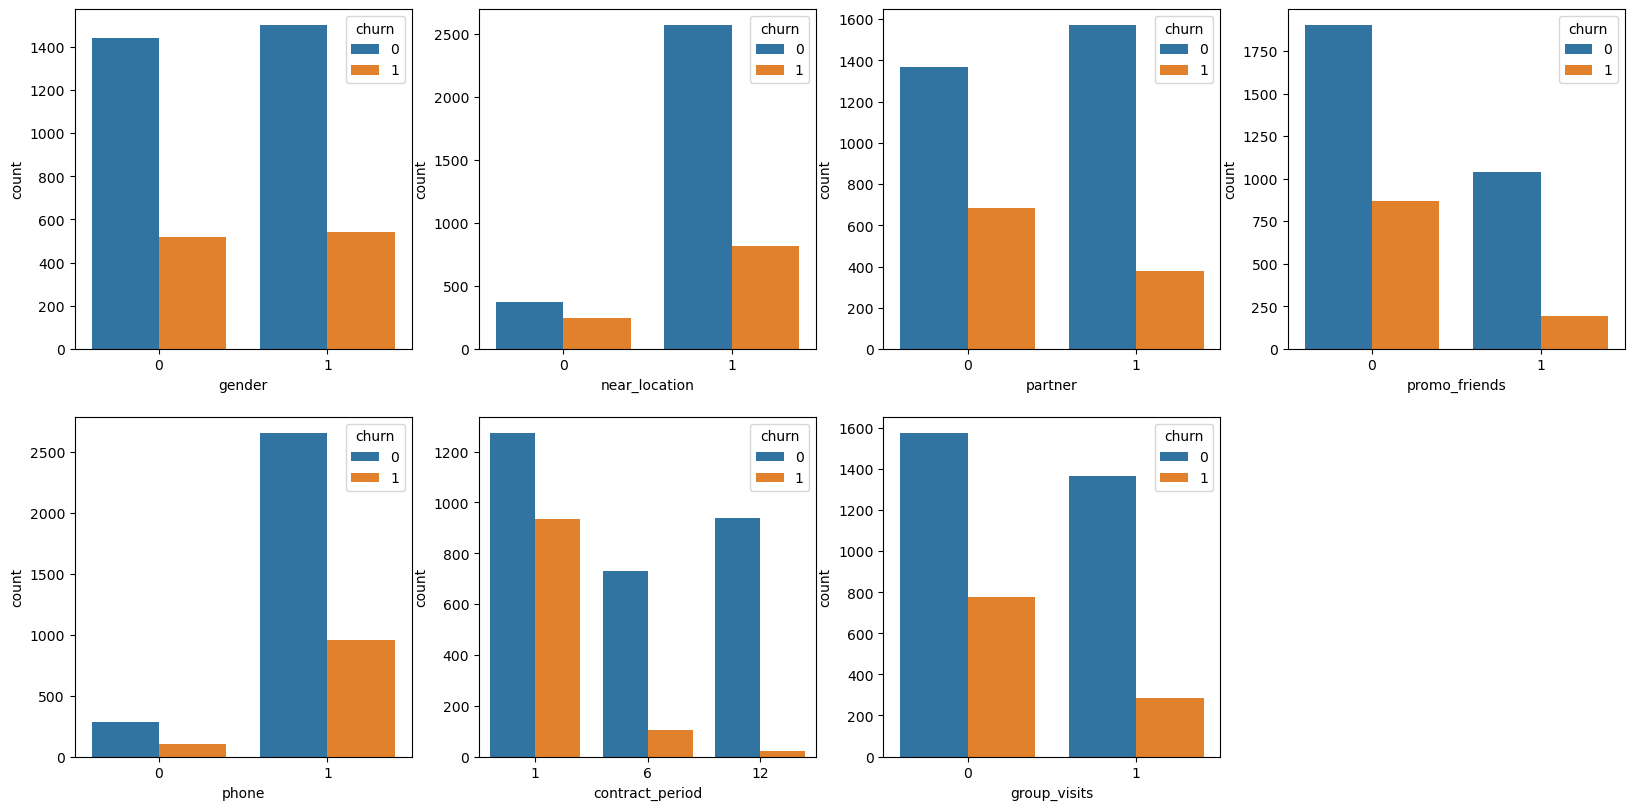

In [11]:
# выделим признаки с категориальными данными
columns_categorical = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']

# построим графики countplot для категориальных данных
fig, ax = plt.subplots(figsize=(20, 15))

for i, column in enumerate(columns_categorical):   
    plt.subplot(3, 4, i+1)
    sns.countplot(data=df, x=column, hue='churn')
    
plt.show()

#### Выводы
Анализ гистограмм подтверждает выводы о различиях признаков между группами, сделанные по результатам анализа средних значений признаков. Дополнительно можно добавить, что гистограмма распределения средней частоты посещений в неделю за предыдущий месяц наглядно показывает, что те, кто попал в отток, чаще всего уже не приходят в клуб в предыдущий месяц.

#### Построим матрицу корреляций и отобразим её

<Axes: >

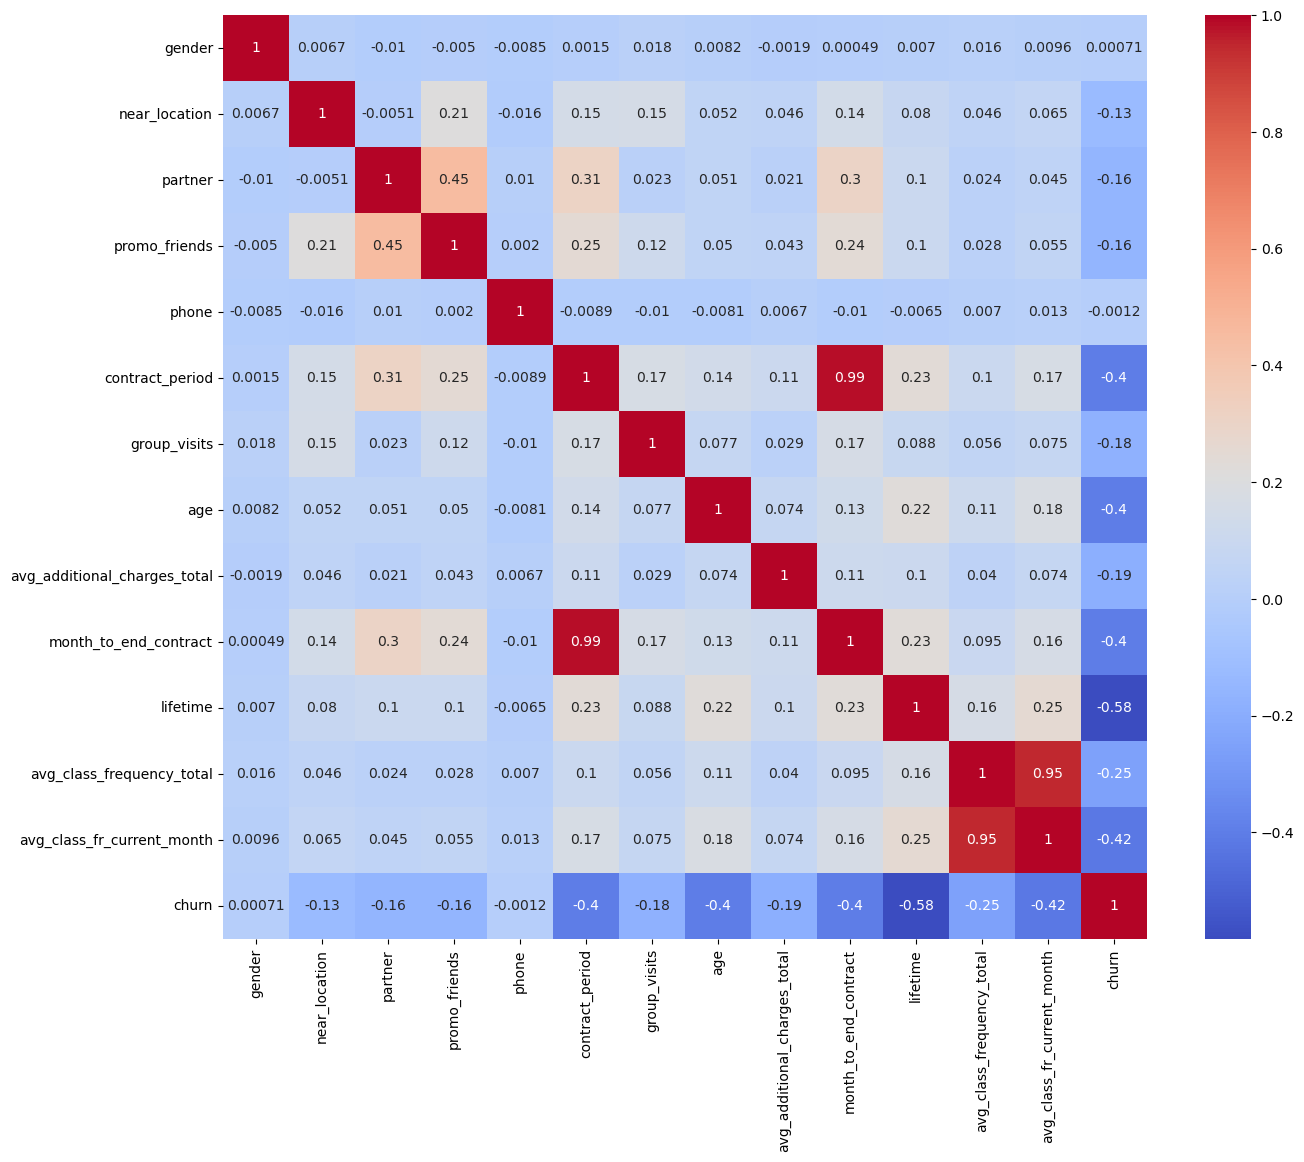

In [12]:
#построим и отрисуем матрицу корреляций
cm = df.corr(method='spearman')  #вычисляем матрицу корреляций

plt.figure(figsize=(15, 12))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True, cmap='coolwarm')  

Часть признаков имеет высокую степень корреляции между собой, это: контрактный период и количество месяцев до окончания контрактного периода (0,97); средняя частота посещений в неделю за все время и за предыдущий месяц (0,95). В этом случае можно какие-то из этих парнозависимых признаков удалить если используемая модель чувствительная к мультиколлинеарности и не имеет встроенной регуляризации.

### Выводы 

Изучили связь признаков с фактом оттока клиентов из финтнес-центра.
Получили средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался. На основании анализа средних значений признаков можно сделать следующие выводы:
- По полу отличий между группами нет.
- Те, кто остался в среднем живут и работают поближе к фитнес-центру.
- Те, кто остался в среднем существенно чаще являются участниками партнёрской программы.
- Те, кто остался в среднем существенно чаще пришли в клуб в рамках акции "Приведи друга".
- Наличие контактного телефона. Существенных отличий между группами нет.
- У тех, кто остался в среднем контрактный период выше в разы.
- Те, кто остался в среднем посещают групповые зания существенно чаще.
- В среднем более старшие клиенты реже бросают занятия.
- Суммарная выручка от других услуг фитнес-центра выше у оставшихся клиентов.
- У тех, кто остался в среднем период до окончания контракта и "время жизни" выше в разы.
- Средняя частота посещений в неделю за все время и за предыдущий месяц существенно выше у тех, кто остался.

Построили матрицу корреляции оттока с признаками. Корреляция целевой переменной со следующими признаками (в порядке убывания коэффициента корреляции):
- средняя частота посещений в неделю за предыдущий месяц (-0.41)
- возраст (-0.40)
- контрактный период (-0.39)
- количество месяцев до окончания контрактного периода (-0.38)
- средная частота посещений в неделю за весь период (-0.25)
- суммарная выручка от других услуг фитнес-центра (-0.20)
- факт посещения групповых занятий (-0.18)
- факт первоначальной записи в рамках акции «приведи друга» (-0.16)
- сотрудник компании-партнёра клуба (-0.16)
- проживание или работа в районе, где находится фитнес-центр (-0.13)

Визуализировали распределения признаков для двух групп клиентов, тех, кто ушёл и тех, кто остался. 

## Шаг 3. Построение модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
Разобьём данные на обучающую и валидационную выборку функцией train_test_split().
Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом.
Оценим модели по метрикам accuracy, precision и recall.


Модель логистической регрессии чувствительна к мультиколлинеарности, но логистическая регрессия имеет встроенную регуляризацию, которая может помочь справиться с этой проблемой. Случайный не имеет чувствительности к мультиколлинеарности.

In [13]:
#разделим данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis = 1) 
y = df['churn'] 

In [14]:
#разделим данные на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [15]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [16]:
# зададим алгоритм Логистическая регрессия для модели
model_lr = LogisticRegression(solver='liblinear', random_state=0)

In [17]:
# зададим алгоритм Случайный лес для модели
model_rf = RandomForestClassifier(random_state=0)

In [18]:
# обучим модели
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
# получим предсказания для модели Логистической регрессии
y_pred = model_lr.predict(X_test)

In [19]:
# получим метрики accuracy, precision и recall для модели Логистической регрессии
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))

Accuracy: 0.93
Precision: 0.89
Recall: 0.83


In [20]:
# получим предсказанные вероятности положительного класса
y_scores = model_lr.predict_proba(X_test)[:, 1]

In [21]:
# получим метрику ROC AUC для логистической регрессии
print('ROC AUC: {:.2f}'.format(roc_auc_score(y_test, y_scores)))

ROC AUC: 0.98


In [22]:
# напишем функцию для вычисления метрик
def metric_calculation(y_test, X_test, model):
    y_pred = model.predict(X_test)
    y_scores = model.predict_proba(X_test)[:, 1]
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('ROC AUC: {:.2f}'.format(roc_auc_score(y_test, y_scores)))

In [23]:
# получим предсказания для модели Случайного леса
y_pred = model_rf.predict(X_test)
# получим метрики accuracy, precision и recall для модели Случайного леса
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))

Accuracy: 0.92
Precision: 0.88
Recall: 0.83


In [24]:
# получим метрики accuracy, precision, recall и ROC AUC для модели Случайного леса
metric_calculation(y_test, X_test, model_rf)

Accuracy: 0.92
Precision: 0.88
Recall: 0.83
ROC AUC: 0.97


In [25]:
# получим метрики accuracy, precision, recall и ROC AUC для модели Логистической регрессии ()
metric_calculation(y_test, X_test, model_lr)

Accuracy: 0.93
Precision: 0.89
Recall: 0.83
ROC AUC: 0.98


### Выводы
Модели показывают достаточно высокие значения метрик accuracy, precision, recall ROC AUC. У модели Логистической регрессии указанные метрики несколько выше, чем у модели Случайного леса. 

## Шаг 4. Кластеризация клиентов

In [26]:
# стандартизируем данные
X_sc = scaler.fit_transform(X)
# построим матрицу расстояний функцией linkage()
linked = linkage(X_sc, method = 'ward') 

In [ ]:
# построим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM');

In [ ]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0, n_init=10)
# прогнозируем кластеры для наблюдений 
labels = km.fit_predict(X_sc)
list_columns = df.columns

# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру и упорядочим по степени увеличения оттока
df.groupby('cluster_km')[list_columns].mean().sort_values(by='churn').T

#### Выводы
Мы видим, что средние значения признаков существенно различаются между кластерами.
1. "Время жизни клиента" у "лучших" кластеров почти в 2 раза выше, чем у "худших". Но "время жизни" - это не причина, а следствие оттока.
2. Средняя частота посещений в неделю за предыдущий месяц у "лучших" кластеров сотавляет 1.97 и 2.85, а у "худших" - 1.01 и 1.48.
3. Средний возраст у "лучших" кластеров сотавляет 29.82 и 30.12, а у "худших" - 28.17 и 28.48.
4. Средний контрактный период у "лучших" кластеров сотавляет 10.89 и 2.67, а у "худших" - 1.95 и 2.35.
5. Среднее количество месяцев до окончания контрактного периода у "лучших" кластеров сотавляет 9.95 и 2.46, а у "худших" - 1.86 и 2.2.
6. Средная частота посещений в неделю за весь период у "лучших" кластеров сотавляет 1.98 и 2.85, а у "худших" - 1.25 и 1.66.
7. У "лучших" кластеров более высокие показатели суммарной выручки от других услуг фитнес-центра.
7. Посещение групповых программ у "лучших" кластеров существенно выше.
8. Участники акции "Пригласи друга" реже попадают в отток.
9. Показатель участия в Партнерской программе также выше у "лучших" кластеров.
10. У клиентов, которые живут или работают поблизости с фитнес-центром, показатели оттока ниже.
11. Остальные признаки (наличие телефона и пол) практически не влияют на показатель оттока.

In [ ]:
# посмотрим на число примеров попавших в кластеры
df.groupby('cluster_km')['gender'].count()

Размер минимальной выборки (кластера) - 385 значений. Это достаточно для проверки статистической значимости отличий средних значений.

In [ ]:
# посмотрим на средние значения признаков по кластерам
cluster_features = df.groupby('cluster_km').mean().reset_index()

numeric_columns = cluster_features.drop(columns=['cluster_km']).columns

(cluster_features.style.format({i: '{:.2f}' for i in numeric_columns})
 .highlight_max(color='yellowgreen', subset=numeric_columns)
 .highlight_min(color='coral', subset=numeric_columns))

In [ ]:
# посмотрим на средние значения признаков по кластерам в более удобном виде
cluster_features.T.style.background_gradient(cmap='coolwarm', axis=1).format("{:.2f}")

### Выводы
**В результате кластеризации мы получили 5 кластеров:**
- два кластера с минимальными  показателями оттока (0-й и 4-й) 
- два кластера с максимальными показателями оттока (3-й и 2-й) 
- один кластер с промежуточным значением показателя оттока (1-й)


**Основные отличия кластеров (по мере увеличения оттока):**

**Кластер 0.** Отток 0.03. Особые отличия от других кластеров: аномально высокий показатель участия в Партнерской программе и в акции "Приведи друга"; маскимальные по продолжительности контракты (10.9) и время до окончания контракта; самое высокое посещение групповых занятий. Их условно можно назвать "Партнеры" по высокому участию в Партнерской программе. Минимальный отток связан с участием в Партнерских программах, акции "Приведи друга", участии в групповых занятиях. 

**Кластер 4.** Отток 0.07. Они похожи на "Партнеров", за исключением: низкий показатель участия в Партнерской программе и в акции "Приведи друга"; короткий контрактный период; высокое участие в групповых занятиях; самый высокий средний возраст; самое высокое "время жизни"; особое отличие - аномально высокая частота занятий - почти 3 раза в неделю. Их условно можно назвать "Фитнес-фанаты". Низкий отток связан в первую очередь с внутренним желанием интенсивно заниматься, а также с участием в групповых занятиях.

**Кластер 1.** Отток 0.27, средний между "лучшими" и "худшими". Отличительная особенность - это полное отсутствие контактных данных. Остальные признаки находятся по средине между "лучшими" и "худшими". Их условно можно назвать "Средняки без телефонов". У них в основном средние значения признаков и средний отток.

**Кластер 2.** Отток 0.44. Отличительной особенностью этого кластера является: то,что клиенты живут и работают не рядом с фитнес-центром; аномально низкое участие в акции "Приведи друга"; самое низкое участие в групповых занятиях.  Их условно можно назвать "Далеко живущие". Отток связан с тем, что они живут и работают не рядом с фитнес-центром, мало участвуют в акции "Приведи друга" и в групповых занятиях.

**Кластер 3.** Отток 0.51. Отличительной особенностью этого кластера является: самый низкий контрактный период и количество месяцев до окончания контракта; самое низкое участие в Партнерских программах; самый низкий возраст; самая низкая интенсивность занятий - 1,25 тренировок в неделю; самый низкий "Срок жизни клиента". Их условно можно назвать "Низко интенсивные". Высокий отток связан с низким участием в Партнерских программах, возрастом и внутренней низкой мотивацией к занятиям.

In [ ]:
# выведем коэффициенты корреляци признаков и целевой переменной в порядке убывания по модулю
cm.sort_values(by='churn', ascending = True)['churn']

In [ ]:
# получим список признаков, упорядоченный по степени связи с оттоком
cm.sort_values(by='churn', ascending = True)['churn'].index

In [ ]:
# построим распределения числовых признаков по кластерам на одной оси
fig, ax = plt.subplots(figsize=(18, 9))
i=1
for column in columns_numeric: 
    plt.subplot(2, 4, i)
    sns.histplot(data=df, x=column, hue='cluster_km', kde=True)    
    i+=1 
    
plt.show()

Получилась не очень удобная для анализа картина.

Построим распределения числовых признаков по кластерам без наложения друг на друга.

In [ ]:
# построим распределения числовых признаков по кластерам 
fig, ax = plt.subplots(figsize=(20, 35))
i=1
for column in columns_numeric: 
    for j in [0,4,1,2,3]:
        plt.subplot(6, 5, i)
        sns.histplot(data=df[df['cluster_km'] == j], x=column, kde=True)
        plt.title('cluster - ' + str(j))
        i=i+1 
    
plt.show()

Эта визуализация более удобна для анализа.

In [ ]:
# построим распределения категориальных признаков по кластерам 
fig, ax = plt.subplots(figsize=(20, 40))
i=1
for column in columns_categorical: 
    for j in [0,4,1,2,3]:
        plt.subplot(7, 5, i)
        sns.countplot(data=df[df['cluster_km'] == j], x=column)
        plt.title('Cluster - ' + str(j))
        i=i+1 
    
plt.show()

#### Выводы
Гистограммы распределения признаков наглядно подтверждают выводы о различиях признаков между кластерами, сделанные по результатам анализа средних значений признаков.

Дополнительные наблюдения:
- в самом "лучшем" кластере нет контрактного периода 1 месяц, 
- в самом "худшем" кластере практически нет контрактного периода 12 месяцев. 

In [ ]:
# Рассмотрим отдельно влияние контрактного периода на отток и "срок жизни клиента"
df['contract_period'].value_counts() # группировка клиентов по контрактному периоду

In [ ]:
# отток и "срок жизни клиента" с контрактным периодом 1 месяц
df.query('contract_period == 1')[['churn', 'lifetime']].mean()

In [ ]:
# отток и "срок жизни клиента" с контрактным периодом 6 месяцев
df.query('contract_period == 6')[['churn', 'lifetime']].mean()

In [ ]:
# отток и "срок жизни клиента" с контрактным периодом 12 месяцев
df.query('contract_period == 12')[['churn', 'lifetime']].mean()

In [ ]:
# отток и "срок жизни клиента" с контрактным периодом 1 месяц в "худшем" кластере
df.query('contract_period == 1 and cluster_km == 1 ')[['churn', 'lifetime']].mean()

## Выводы

В процессе исследования мы выполнили следующее.

**1. Загрузили данные и выполнили базовый анализ данных.** 

Данные полные, пропусков нет, дубликатов нет.

**2. Провели исследовательский анализ данных.**

Изучили связь признаков с фактом оттока клиентов из финтнес-центра.
Получили средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался. На основании анализа средних значений признаков можно сделать следующие выводы:
- По полу отличий между группами нет.
- Те, кто остался в среднем живут и работают поближе к фитнес-центру.
- Те, кто остался в среднем существенно чаще являются участниками партнёрской программы.
- Те, кто остался в среднем существенно чаще пришли в клуб в рамках акции "Приведи друга".
- Наличие контактного телефона. Существенных отличий между группами нет.
- У тех, кто остался в среднем контрактный период выше в разы.
- Те, кто остался в среднем посещают групповые зания существенно чаще.
- В среднем более старшие клиенты реже бросают занятия.
- Суммарная выручка от других услуг фитнес-центра выше у оставшихся клиентов.
- У тех, кто остался в среднем период до окончания контракта и "время жизни" выше в разы.
- Средняя частота посещений в неделю за все время и за предыдущий месяц существенно выше у тех, кто остался.

Построили матрицу корреляции оттока с признаками. Корреляция целевой переменной со следующими признаками (в порядке убывания коэффициента корреляции):
- средняя частота посещений в неделю за предыдущий месяц (-0.41)
- возраст (-0.40)
- контрактный период (-0.39)
- количество месяцев до окончания контрактного периода (-0.38)
- средная частота посещений в неделю за весь период (-0.25)
- суммарная выручка от других услуг фитнес-центра (-0.20)
- факт посещения групповых занятий (-0.18)
- факт первоначальной записи в рамках акции «приведи друга» (-0.16)
- сотрудник компании-партнёра клуба (-0.16)
- проживание или работа в районе, где находится фитнес-центр (-0.13)

Визуализировали распределения признаков для двух групп клиентов, тех, кто ушёл и тех, кто остался. 

**3. Построили модель, прогнозирующую вероятность оттока (на уровне следующего месяца) для каждого клиента.**

Использовали модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце. Выбрали модели Логистической регрессии и Случайного леса. Оценили модели по метрикам accuracy, precision, recall и ROC AUC.

Метрики модели Логистической регрессии:
- Accuracy: 0.93
- Precision: 0.89
- Recall: 0.83
- ROC AUC: 0.98

Метрики модели Случайного леса:
- Accuracy: 0.92
- Precision: 0.86
- Recall: 0.81
- ROC AUC: 0.97

Модели показывают достаточно высокие значения метрик accuracy, precision, recall и ROC AUC. У модели Логистической регрессии указанные метрики несколько выше, чем у модели Случайного леса.


**4. Провели кластеризацию с помощью алгоритма K-Means и выделили 5 целевых групп клиентов.**

Получили средние значения признаков и визуализировали распределения признаков по полученным кластерам.
   
Основные отличия кластеров (по мере увеличения оттока):

**Кластер 0.** Отток 0.03. Особые отличия от других кластеров: аномально высокий показатель участия в Партнерской программе и в акции "Приведи друга"; маскимальные по продолжительности контракты (10.9) и время до окончания контракта; самое высокое посещение групповых занятий. Их условно можно назвать "Партнеры" по высокому участию в Партнерской программе. Минимальный отток связан с участием в Партнерских программах, акции "Приведи друга", участии в групповых занятиях. 

**Кластер 4.** Отток 0.07. Они похожи на "Партнеров", за исключением: низкий показатель участия в Партнерской программе и в акции "Приведи друга"; короткий контрактный период; высокое участие в групповых занятиях; самый высокий средний возраст; самое высокое "время жизни"; особое отличие - аномально высокая частота занятий - почти 3 раза в неделю. Их условно можно назвать "Фитнес-фанаты". Низкий отток связан в первую очередь с внутренним желанием интенсивно заниматься, а также с участием в групповых занятиях.

**Кластер 3.** Отток 0.27, средний между "лучшими" и "худшими". Отличительная особенность - это полное отсутствие контактных данных. Остальные признаки находятся по средине между "лучшими" и "худшими". Их условно можно назвать "Средняки без телефонов".

**Кластер 2.** Отток 0.44. Отличительной особенностью этого кластера является: то,что клиенты живут и работают не рядом с фитнес-центром; аномально низкое участие в акции "Приведи друга"; самое низкое участие в групповых занятиях.  Их условно можно назвать "Далеко живущие". Отток связан с тем, что они живут и работают не рядом с фитнес-центром, мало участвуют в акции "Приведи друга" и в групповых занятиях.

**Кластер 1.** Отток 0.51. Отличительной особенностью этого кластера является: самый низкий контрактный период и количество месяцев до окончания контракта; самое низкое участие в Партнерских программах; самый низкий возраст; самая низкая интенсивность занятий - 1,25 тренировок в неделю; самый низкий "Срок жизни клиента". Их условно можно назвать "Низко интенсивные". Высокий отток связан с низким участием в Партнерских программах, возрастом и внутренней низкой мотивацией.

**Сформулировали рекомендации по увеличению удержания клиентов:**
  
- **В рекламе и продвижении фитнес-центра делать упор на те направления, которые привлекают клиентов с низким показателем оттока:**
- партнерские программы;
- акции "Приведи друга";
- в части таргетирования рекламы следует больше ориентироваться на возраст 30 - 35 лет, чем на 20 - 25 лет.


- **Развивать программы с групповыми занятиями**, это скорее всего повышает "привязанность" клиентов к клубу.

- **Проработать возможность изменения контрактной системы и отказаться от одно-месячного контракта** (либо сделать его не выгодным по цене). Самый "лучший" кластер не имеет одномесячных контрактов, а самый "худший" - не имеет 12-ти месячных контрактов. При этом возможно несколько уменьшится общее количество клиентов (но может быть и не уменьшится), но при этом уменьшится количество клиентов с короткими контрактами (отток которых составляет более 50% и на которых расходуется рекламный ресурс) и увеличится количество клиентов с длинными контрактами (которые практически не уходят в отток и больше тратят на другие услуги фитнес-центра). При этом прибыль компании может увеличиться. Требуется дополнительный финансовый анализ. Возможно стоит провести А/В-тестирование. 